# Cartesian Distance Approximation

A YouTube video demonstrates that:

$$
  \sqrt{x^2 + y^2} \approx 0.96x + 0.4y
$$

With less than 4% error for $x >= y >= 0$.

I wonder what this looks like if we try to use the approximation to draw a circle?

https://www.youtube.com/watch?v=NWBEA2ECX-A

In [2]:
import math
import matplotlib.pyplot as plt

# Image parameters
XMIN=-250
XMAX=250
YMIN=-250
YMAX=250
RADIUS = 175

# Pixel values
INSIDE_ACTUAL = (255,0,0)
INSIDE_APPROX = (0,255,0)
OUTSIDE = (0,0,0)

First, let's draw a real circle:

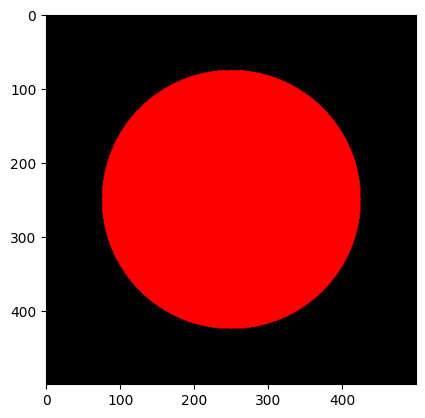

In [3]:
def circle(x, y):
    if math.sqrt(x**2 + y**2) <= RADIUS:
        return INSIDE_ACTUAL
    else:
        return OUTSIDE

pixels = [[circle(x,y) for x in range(XMIN,XMAX)] for y in range(YMIN,YMAX)]

imgplot = plt.imshow(pixels)


Next, let's draw a circle using the approximation:

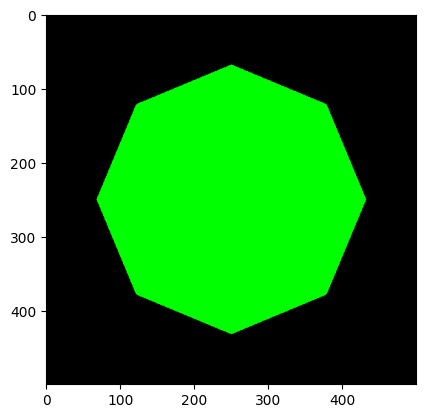

In [4]:
def approx_circle(x, y):
    x = abs(x)
    y = abs(y)
    if x >= y >= 0:
        if 0.96*x + 0.4*y <= RADIUS:
            return INSIDE_APPROX
        else:
            return OUTSIDE
    elif y >= x >= 0:
        if 0.96*y + 0.4*x <= RADIUS:
            return INSIDE_APPROX
        else:
            return OUTSIDE
    else:
        return OUTSIDE


pixels = [[approx_circle(x,y) for x in range(XMIN,XMAX)] for y in range(YMIN,YMAX)]

imgplot = plt.imshow(pixels)

It turns out it's an octagon!

Let's overlay them to see the error:

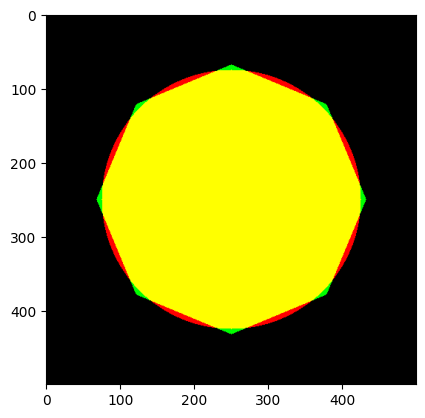

In [5]:
def combined(x,y):
    actual = circle(x,y)
    approx = approx_circle(x,y)
    return tuple(map(lambda a,b: a|b, actual, approx))

pixels = [[combined(x,y) for x in range(XMIN,XMAX)] for y in range(YMIN,YMAX)]

imgplot = plt.imshow(pixels)